<a href="https://colab.research.google.com/github/otionrec/.github-workflows/blob/master/GreatLearning_MLAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#bos1 = pd.read_csv('/content/drive/MyDrive/Data Science Projects/BostonHousing.csv', header=None, delimiter=r"\s+", names=column_names)
# The above may be problematic

bos = pd.read_csv('/content/drive/MyDrive/Data Science Projects/BostonHousing.csv')
bos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#Capitalizing column titles
bos1 = bos.rename(columns=str.upper)

In [ ]:
bos1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
bos1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# Processing the data: Removing NaN values
# Finding out if dataset has NaN
# luckily this dataset has no NaN values (clean/processed)
bos1.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
bos1.count()

,0
CRIM,506
ZN,506
INDUS,506
CHAS,506
NOX,506
RM,506
AGE,506
DIS,506
RAD,506
TAX,506


**Splitting model data with 70% for training**

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array(bos1.iloc[:,0:13])
Y=np.array(bos1["MEDV"])  # Y is the target data
#testing data size is of 30% of entire data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# The random_state is a pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code.
# It has uses in software testing etc.
# However, it is recommended you remove it if you are trying to see how well a model generalizes to new data.


**Using Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# load our first model
lr = LinearRegression()
# train the model on training data
lr.fit(x_train, y_train)
#predict the testing data so that we can later evaluate the model
pred_lr = lr.predict(x_test)

**Model Evaluation**

In [ ]:
# error for linear regression
mse_lr = sklearn.metrics.mean_squared_error(y_test, pred_lr, squared=False)
print("MSE for Linear Regression: ", mse_lr)
print("error for Linear Regression = {} ".format(mse_lr))

MSE for Linear Regression:  5.540490745781336
error for Linear Regression = 5.540490745781336 


In [ ]:
bos1.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Naive Bayes Algorithm
- Based on Bayes theorem (conditional probability .i.e probability that one event had already occurred)
- Supervised learning
- Called "Naive" because of no co-dependency in attributes
- Very popular in social media marketing and product management

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



In [ ]:
salary = pd.read_csv('/content/drive/MyDrive/Data Science Projects/adult.csv')
salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# splitting not the same as for linear regression here
# in some cases separate csv files for train and test data are inputted
# Below is a code I found an Stack Overflow

# Train test split is a model validation process that allows you to simulate how your model would perform with new data.
salary['split'] = np.random.randn(salary.shape[0], 1)

msk = np.random.rand(len(salary)) <= 0.7

salary_train_splits = salary[msk]
salary_test_splits = salary[~msk]

salary_train = salary_train_splits.drop(['split'], axis=1)
salary_test = salary_test_splits.drop(['split'], axis=1)
salary_train.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K


In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder() # later assigned to number

# from sklearn.preprocessing import LabelEncoder

# label encoding is converting categorical data into numerical data
string_columns=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
for i in string_columns:
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])

In [ ]:
# Assigning the encoded variables for training and testing
# maybe I can manipulate the linear regression split type here

colnames = salary_train.columns
len(colnames[0:14])
trainX = salary_train[colnames[0:14]]
trainY = salary_train[colnames[14]]
testX = salary_test[colnames[0:14]]
testY = salary_test[colnames[14]]

**Gaussian Naive Bayes classifier for model fitting**

(There 3 types of Naive Bayes classifiers)

**Gaussian Naive Bayes is used for the classification of continuous data**
*eg. Salary, which can have a continuous graph of highs and lows*

In [ ]:
sgnb = GaussianNB()

In [ ]:
# Pass the value for predicting test data
# thus predicting Y values for testX
spred_gnb = sgnb.fit(trainX,trainY).predict(testX)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_gnb = confusion_matrix(testY, spred_gnb)
print(cm_gnb)
print("Accuracy", (10517+1040)/(10517+581+2474+1040))

# Or Also below using the accuracy_score module and passing Y testing values and Y predicted values(spred_gnb)
score = accuracy_score(testY, spred_gnb)
print("Accuracy: ", score)  # The value keep changing after every runtime because I have not implemented and such idea a a random_state(get the idea?)

[[10599   602]
 [ 2472  1074]]
Accuracy 0.7909252669039146
Accuracy:  0.7915508238963858


# K-NN(K-Nearest Neighbour) Algorithm

In [ ]:
# Using the Boston Housing Data set
bos1.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Finding out if the data is clean (already clean!)
bos1.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
# Splitting model data with 70% for training

from sklearn.model_selection import train_test_split
X=np.array(bos1.iloc[:,0:13])
Y=np.array(bos1["MEDV"])  # Y is the target data
#testing data size is of 30% of entire data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#train the model on training data
lr.fit(x_train, y_train)
#load the KNN Model
Nn = KNeighborsRegressor(3)
Nn.fit(x_train, y_train)
pred_Nn = Nn.predict(x_test)

In [ ]:
# Hyperparameter Tuning (finding out if K=3 is an appropriate value)

for i in range(1, 50):
  model=KNeighborsRegressor(i)
  model.fit(x_train, y_train)
  pred_y = model.predict(x_test)
  mse = sklearn.metrics.mean_squared_error(y_test, pred_y, squared=False)
  print("{} error for k = {}".format(mse, i))

  # judging from the output, k = 4 yielded a least MSE
  # hence 4 the best K value not 3 as we selected
  # but it is close so we continue anyway. (you can change to k=4)

7.97154478854566 error for k = 1
7.159484875618533 error for k = 2
7.014927171138291 error for k = 3
7.004019640065342 error for k = 4
7.036131375752027 error for k = 5
7.103650686103268 error for k = 6
7.249246229196143 error for k = 7
7.278466403768686 error for k = 8
7.490296733721186 error for k = 9
7.573928228851226 error for k = 10
7.580880154071545 error for k = 11
7.620709624858009 error for k = 12
7.702433441773159 error for k = 13
7.745706188130712 error for k = 14
7.855546909761407 error for k = 15
7.970845764140948 error for k = 16
8.00708692880329 error for k = 17
8.05951400020052 error for k = 18
8.105972848197592 error for k = 19
8.171623447622684 error for k = 20
8.208766061680672 error for k = 21
8.266010100575647 error for k = 22
8.280897264278922 error for k = 23
8.326448746059764 error for k = 24
8.38105978099617 error for k = 25
8.410954693047014 error for k = 26
8.478704509976565 error for k = 27
8.50999986845734 error for k = 28
8.538275555508479 error for k = 29

In [ ]:
# Error for KNN Algorithm

mse_Nn = sklearn.metrics.mean_squared_error(y_test, pred_Nn, squared=False)
print("MSE for KNN: ", mse_Nn)

MSE for KNN:  7.014927171138291


After calculating the mean squared error, one must interpret it.
E.g. Is a MSR of 7.015 close enough to zero to represent a “good” value? Such questions sometimes do not have a simple answer.

In [ ]:

# Remeber for the same data set, the MSE was 5.54 for Linear Regression
# Meanig the algorith learned better for LR
# Thus LR best fits this data set
# The clarity we get for using multiple algorithms

# Suppot Vector Machines(SVMs)

In [ ]:
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Social_Network_ads.csv')
dataset.head()

# Below, for training, 0 means the person "did't" purchase, 1 means otherwise

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Filtering out columns to ratain age and salary columns
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [ ]:
#Data split for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# A random_state = 0 is not the same as random_state = None

In [ ]:
# Scaling using Standard Scalar for Normal Distribution

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Buiding the model using RBF Kernel
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)
y_pred_rbf = classifier_rbf.predict(X_test)

In [ ]:
# Printing the confusion Matrix

from sklearn.metrics import confusion_matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print(cm_rbf)
# The confusion Matrix looks good as we have higher values of True outcomes

[[64  4]
 [ 3 29]]


In [ ]:
# Classification Report

from sklearn.metrics import classification_report
class_report_rbf = classification_report(y_test, y_pred_rbf)
print(class_report_rbf)

# Below, for prediction 0 means the person "won't" purchase, 1 means otherwise
# The support of a random variable is the set of values that the random variable can take.

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Random Forest Algorithm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Position_Salaries.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
# Selecting useful data
X=df.iloc[:,1:2].values
y=df.iloc[:,2].values

In [ ]:
# Model fitting with 10 trees

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
# Predicting of salary with level > 6.5

y_pred = regressor.predict([[6.5]])
y_pred
# y_pred = model.predict([[6.5]])

array([167000.])

<ipython-input-161-76314b1c0dab>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid_data = np.arange(min(X), max(X), 0.01)


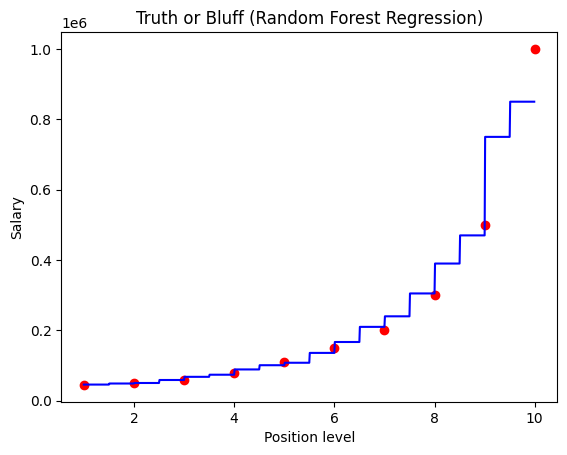

In [ ]:
X_grid_data = np.arange(min(X), max(X), 0.01)
X_grid_data = X_grid_data.reshape((len(X_grid_data), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid_data, regressor.predict(X_grid_data), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Comparing to the info in the dataset
# the graph predicts correctly around 20,000 salary for level 6.5